Merge the three different datasets based on the txId in order to have the features, class and neighbor for each transaction in one dataframe.

In [1]:
import pandas as pd
from helpers import read_csv, load_pickled_data, pickle_data
import os
import matplotlib.pyplot as plt 
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go

DATASET_BASE = "dataset"
PICKLED_OBJS = "pickled_objs"

txs_classes:pd.DataFrame = read_csv(os.path.join(DATASET_BASE, "elliptic_txs_classes.csv"), ret_Dataframe=True)
txs_edgelist:pd.DataFrame = read_csv(os.path.join(DATASET_BASE, "elliptic_txs_edgelist.csv"), ret_Dataframe=True)
txs_features:pd.DataFrame =  read_csv(os.path.join(DATASET_BASE, "elliptic_txs_features.csv"), ret_Dataframe=True)


merge_feats_class = pd.merge(txs_features, txs_classes, on='txId').dropna()
merge_feats_class

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


In [2]:
list(merge_feats_class.columns)

['txId',
 'Time step',
 'Local_feature_1',
 'Local_feature_2',
 'Local_feature_3',
 'Local_feature_4',
 'Local_feature_5',
 'Local_feature_6',
 'Local_feature_7',
 'Local_feature_8',
 'Local_feature_9',
 'Local_feature_10',
 'Local_feature_11',
 'Local_feature_12',
 'Local_feature_13',
 'Local_feature_14',
 'Local_feature_15',
 'Local_feature_16',
 'Local_feature_17',
 'Local_feature_18',
 'Local_feature_19',
 'Local_feature_20',
 'Local_feature_21',
 'Local_feature_22',
 'Local_feature_23',
 'Local_feature_24',
 'Local_feature_25',
 'Local_feature_26',
 'Local_feature_27',
 'Local_feature_28',
 'Local_feature_29',
 'Local_feature_30',
 'Local_feature_31',
 'Local_feature_32',
 'Local_feature_33',
 'Local_feature_34',
 'Local_feature_35',
 'Local_feature_36',
 'Local_feature_37',
 'Local_feature_38',
 'Local_feature_39',
 'Local_feature_40',
 'Local_feature_41',
 'Local_feature_42',
 'Local_feature_43',
 'Local_feature_44',
 'Local_feature_45',
 'Local_feature_46',
 'Local_feature_47',

Classes and the corresponding amount of transactions

In [3]:
txs_by_class = merge_feats_class.groupby('class').count()
txs_by_class
_x = ["Illicit", "Licit", "Unknown"]

d = {
    "Illicit":'blue',
    "Licit": 'red',
    "Unknown":'yellow'
}

merge_feats_class['class'].value_counts()

#plt.bar(['Ilicit', 'Licit', 'Unknown'], txs_by_class['txId'].values, color=['blue', 'red', 'yellow'] )
data = [go.Bar(x=_x,
            y=txs_by_class['txId'].values)]

plotly.offline.iplot(data, filename='jupyter-txs_per_class')


In [4]:
illicit_df = merge_feats_class.loc[merge_feats_class['class'] == 1]
llicit_df = merge_feats_class.loc[merge_feats_class['class'] == 2]
unknown_df = merge_feats_class.loc[merge_feats_class['class'] == 3]

print(llicit_df.describe())
print(illicit_df.describe())


               txId     Time step  Local_feature_1  Local_feature_2  \
count  4.150000e+04  41500.000000     41500.000000     41500.000000   
mean   1.715688e+08     24.468602        -0.039009         0.180928   
std    1.101834e+08     15.526605         0.742949         1.563702   
min    2.534000e+03      1.000000        -0.172982        -0.210553   
25%    8.500541e+07      8.000000        -0.172664        -0.169302   
50%    1.585747e+08     24.000000        -0.169944        -0.107012   
75%    2.454261e+08     40.000000        -0.132140         0.021241   
max    4.031232e+08     49.000000        39.786756        69.469535   

       Local_feature_3  Local_feature_4  Local_feature_5  Local_feature_6  \
count     41500.000000     41500.000000     41500.000000     41500.000000   
mean          0.138691         0.193141         0.038930         0.204183   
std           1.066700         1.622307         1.831936         1.592211   
min          -1.756361        -0.121970        -0.06

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(mutual_info_classif, k=15)
timestep_dataframe = merge_feats_class.loc[merge_feats_class['Time step'] == 20].reset_index(drop=True)

selector.fit(timestep_dataframe.drop(["class", "txId"], axis=1), timestep_dataframe["class"])
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
timestep_dataframe_kfeats = timestep_dataframe.iloc[:,cols_idxs]

print(list(timestep_dataframe_kfeats.columns))
timestep_dataframe_kfeats.describe()

['Local_feature_1', 'Local_feature_42', 'Local_feature_46', 'Local_feature_48', 'Local_feature_51', 'Local_feature_52', 'Local_feature_54', 'Local_feature_58', 'Local_feature_60', 'Local_feature_64', 'Local_feature_66', 'Local_feature_76', 'Local_feature_78', 'Local_feature_88', 'total_BTC']


,Local_feature_1,Local_feature_42,Local_feature_46,Local_feature_48,Local_feature_51,Local_feature_52,Local_feature_54,Local_feature_58,Local_feature_60,Local_feature_64,Local_feature_66,Local_feature_76,Local_feature_78,Local_feature_88,total_BTC
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,-0.124447,-0.060680,0.139327,-0.080535,-0.017636,0.006499,-0.059368,-0.008526,-0.133888,-0.008522,-0.133879,0.041525,0.082117,0.136832,7.694795
std,0.172430,0.404885,1.103075,0.513906,0.921356,0.961409,0.699984,0.288060,0.219928,0.288069,0.219924,1.034889,0.974949,1.284322,27.336919
min,-0.172983,-0.075256,-0.227203,-0.097895,-3.745387,-0.414036,-0.232553,-0.039151,-0.163126,-0.039146,-0.163115,-0.095403,-0.250574,-0.293905,0.000024
25%,-0.172600,-0.075256,-0.227203,-0.097895,0.042345,-0.414003,-0.232553,-0.039151,-0.163126,-0.039146,-0.163115,-0.095403,-0.250574,-0.293848,0.060598
50%,-0.170397,-0.075256,-0.227203,-0.097895,0.042345,-0.413883,-0.232553,-0.039150,-0.163122,-0.039145,-0.163111,-0.095403,-0.250540,-0.293732,0.409876
75%,-0.149563,-0.075256,-0.226199,-0.097895,0.042345,-0.192723,-0.232553,-0.039136,-0.162944,-0.039131,-0.162933,-0.094506,-0.243493,-0.207635,3.712957
max,2.618428,25.332272,9.081401,31.951632,3.830078,6.774753,8.076359,8.301668,4.952576,8.303391,4.952638,25.820300,8.315241,8.933291,442.549141


  1 / 101: ksone
  2 / 101: kstwo
  3 / 101: kstwobign
  4 / 101: norm
  5 / 101: alpha
  6 / 101: anglit
  7 / 101: arcsine
  8 / 101: beta
  9 / 101: betaprime
 10 / 101: bradford
 11 / 101: burr
 12 / 101: burr12
 13 / 101: fisk
 14 / 101: cauchy
 15 / 101: chi
 16 / 101: chi2
 17 / 101: cosine
 18 / 101: dgamma
 19 / 101: dweibull
 20 / 101: expon
 21 / 101: exponnorm
 22 / 101: exponweib
 23 / 101: exponpow
 24 / 101: fatiguelife
 25 / 101: foldcauchy
 26 / 101: f
 27 / 101: foldnorm
 28 / 101: weibull_min
 29 / 101: weibull_max
 30 / 101: frechet_r
 31 / 101: frechet_l
 32 / 101: genlogistic
 33 / 101: genpareto
 34 / 101: genexpon
 35 / 101: genextreme
 36 / 101: gamma
 37 / 101: erlang
 38 / 101: gengamma
 39 / 101: genhalflogistic
 40 / 101: gompertz
 41 / 101: gumbel_r
 42 / 101: gumbel_l
 43 / 101: halfcauchy
 44 / 101: halflogistic
 45 / 101: halfnorm
 46 / 101: hypsecant
 47 / 101: gausshyper
 48 / 101: invgamma
 49 / 101: invgauss
 50 / 101: geninvgauss
 51 / 101: norminv

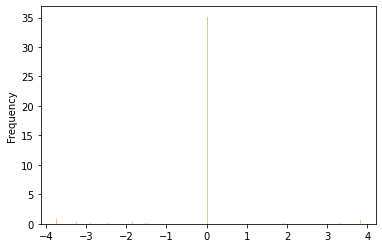

In [6]:
from helpers import best_fit_distribution, make_pdf, find_best_fitted_dist_for_features
import matplotlib
from sklearn.preprocessing import StandardScaler
examined_feature = "Local_feature_51"
_bins = 300
ax = timestep_dataframe[examined_feature].plot(kind='hist', bins=_bins, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])
best_d = best_fit_distribution( timestep_dataframe[examined_feature], _bins, None, True)
#find_best_fitted_dist_for_features(timestep_dataframe, _bins)

In [7]:

best_dist = best_d[0]
print(best_d)
pdf = make_pdf(best_dist[0], best_dist[1], size=timestep_dataframe[examined_feature].shape[0])
print(pdf)
print(timestep_dataframe[examined_feature].shape[0])
print(timestep_dataframe[examined_feature][0])


[(<scipy.stats._continuous_distns.gennorm_gen object at 0x0000026C7F0AB320>, (0.38739474935677176, 0.04234513480691009, 0.0007128989266463196), 766.8691411411373), (<scipy.stats._continuous_distns.dgamma_gen object at 0x0000026C7EFE8828>, (0.33246747967947177, 0.04234513480691009, 0.2143559628875129), 933.7618714077014), (<scipy.stats._continuous_distns.dweibull_gen object at 0x0000026C7EFE8710>, (0.4823086750168329, 0.04234513480691011, 0.14999399568239472), 989.3636556138568), (<scipy.stats._continuous_distns.laplace_gen object at 0x0000026C7F04F780>, (0.0423451348069101, 0.2757879727758983), 1149.3333759089157), (<scipy.stats._continuous_distns.truncnorm_gen object at 0x0000026C7F09C1D0>, (-0.9110858711081566, 2.5515069521745115, 0.00743392116466338, 0.26461023104007575), 1163.0176896237658), (<scipy.stats._continuous_distns.hypsecant_gen object at 0x0000026C7F034F60>, (0.034902893018287987, 0.2751632801995972), 1183.0736202804626), (<scipy.stats._continuous_distns.mielke_gen object

In [8]:
print(pdf)
print(timestep_dataframe[examined_feature].describe())

-0.059276    0.208265
-0.059229    0.208523
-0.059181    0.208780
-0.059134    0.209038
-0.059087    0.209297
               ...   
 0.143777    0.209297
 0.143824    0.209038
 0.143872    0.208780
 0.143919    0.208523
 0.143966    0.208265
Length: 4287, dtype: float64
count    4287.000000
mean       -0.017636
std         0.921356
min        -3.745387
25%         0.042345
50%         0.042345
75%         0.042345
max         3.830078
Name: Local_feature_51, dtype: float64


Text(0, 0.5, 'Frequency')

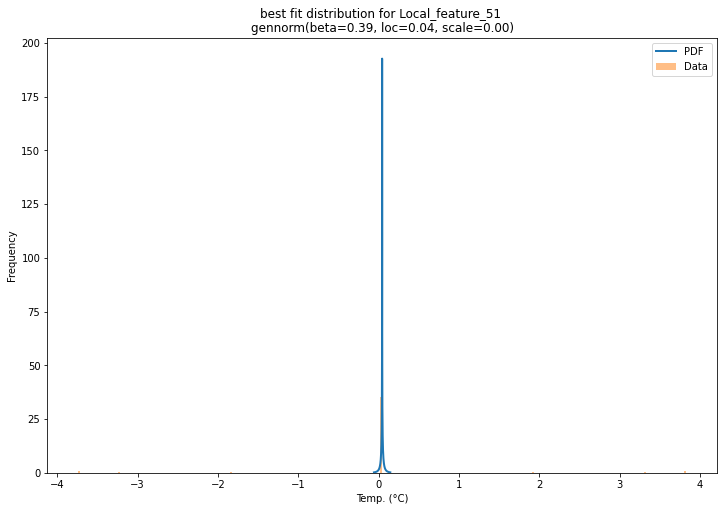

In [9]:

# Plot for comparison
data = timestep_dataframe[examined_feature]
plt.figure(figsize=(12,8))

# Update plots

ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=_bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(f'best fit distribution for {examined_feature} \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')




In [15]:
num_bins = 200
column_to_discretize = examined_feature
timestep_dataframe['A_binned'] = pd.cut(timestep_dataframe[column_to_discretize], bins=num_bins, labels=False)

print(timestep_dataframe['A_binned'])

0        99
1        99
2        99
3       199
4        99
       ... 
4282     50
4283     99
4284     99
4285     99
4286      0
Name: A_binned, Length: 4287, dtype: int64
